In [1]:
import pandas as pd
from db_utils import Query, QueryAll

data = QueryAll("listings")
cols = ["id", "title", "globalId", "categoryId", "categoryName", "url", "location", "shippingType", "shippingLocations",
                "shippingTime", "startTime", "endTime", "returnsAccepted", "conditionId", "listingIsTopRated", 
                "sellerFeedbackScore", "sellerPositivePercent", "sellerName", "sellerIsTopRated", "price", "currency", "bids"]

In [2]:
df = pd.DataFrame(data, columns=cols)

In [3]:
df

,id,title,globalId,categoryId,categoryName,url,location,shippingType,shippingLocations,shippingTime,...,returnsAccepted,conditionId,listingIsTopRated,sellerFeedbackScore,sellerPositivePercent,sellerName,sellerIsTopRated,price,currency,bids
0,134299363330,"Canon EOS 6D Mark II 26,2 MP DSLR Camera, Batt...",EBAY-US,31388,Digital Cameras,https://www.ebay.com/itm/Canon-EOS-6D-Mark-II-...,"Sebring,FL,USA",FreePickup,Worldwide,0,...,0,3000,0,52,100.0,revettflseb,0,787.00,-1,-1
1,265951804753,GoPro Hero5 Black 4k Action Camera with Floati...,EBAY-US,31388,Digital Cameras,https://www.ebay.com/itm/GoPro-Hero5-Black-4k-...,"West Fargo,ND,USA",Flat,Worldwide,3,...,0,3000,0,929,99.7,brody.dreger,1,33.00,-1,-1
2,134296030570,sony a6000 camera body,EBAY-US,31388,Digital Cameras,https://www.ebay.com/itm/sony-a6000-camera-bod...,"Coeur d'Alene,ID,USA",Free,Worldwide,3,...,0,3000,0,736,100.0,brasstang,0,240.00,-1,-1
3,325395882420,Sony Alpha A6400 24.2MP Digital Camera - Black...,EBAY-US,31388,Digital Cameras,https://www.ebay.com/itm/Sony-Alpha-A6400-24-2...,"Tampa,FL,USA",Flat,Worldwide,2,...,0,3000,0,1028,100.0,jrsnick,1,717.00,-1,-1
4,134306375330,(2 Count) Ring Stick Up Cam Battery HD Securit...,EBAY-US,48638,Security Cameras,https://www.ebay.com/itm/2-Count-Ring-Stick-Up...,"Louisville,KY,USA",Free,Worldwide,0,...,0,1000,0,268,96.6,roshicardisland,0,131.00,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,374321074110,"Microsoft Surface Pro 4 Tablet 12.3"" M3-6Y30 ....",EBAY-US,171485,Tablets & eBook Readers,https://www.ebay.com/itm/Microsoft-Surface-Pro...,"Dallas,TX,USA",Free,Worldwide,1,...,1,3000,0,38272,99.9,immortalorigin,1,72.00,-1,-1
9895,155231679243,Brand New Box Unopened - Sony FX6 Full-Frame C...,EBAY-US,11724,Camcorders,https://www.ebay.com/itm/Brand-New-Box-Unopene...,"Lakewood,CA,USA",Flat,Worldwide,3,...,0,1000,0,2198,95.5,paperisdelicious,0,7199.99,-1,-1
9896,185630674304,Apple iPhone 13 Pro Max - 128GB - Sierra Blue ...,EBAY-US,9355,Cell Phones & Smartphones,https://www.ebay.com/itm/Apple-iPhone-13-Pro-M...,"Mountain Home,AR,USA",Calculated,Worldwide,1,...,1,3000,0,3767,100.0,cellerific,0,593.00,-1,-1
9897,185638379717,Apple iPhone XR Black 64GB A1984 Unlocked - Ve...,EBAY-US,9355,Cell Phones & Smartphones,https://www.ebay.com/itm/Apple-iPhone-XR-Black...,"Ashtabula,OH,USA",Calculated,Worldwide,1,...,0,3000,0,88,100.0,droosevelt,0,119.00,-1,-1


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

x, y = df.sellerFeedbackScore.values.reshape(-1,1), df.price.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knn_r_acc = []
for i in range(1,50,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    train_score = knn.score(x_train, y_train)
    knn_r_acc.append((i, test_score, train_score))
scores = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])

In [6]:
model = KNeighborsRegressor(n_neighbors = 50)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=50)

In [7]:
from sklearn.metrics import mean_squared_error 

pred_y = model.predict(x_test)
mse = mean_squared_error(y_test, pred_y)

In [8]:
mse

168245.00476350315

Text(0, 0.5, 'predicted')

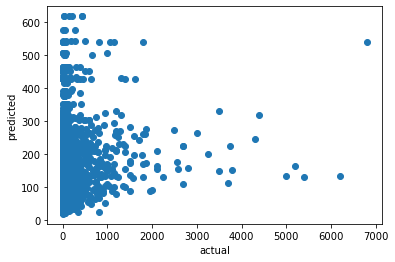

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test,pred_y)
plt.xlabel('actual')
plt.ylabel('predicted')